In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression

In [2]:
data_skoda = pd.read_csv("skoda_cleaned.csv")

In [51]:
data_skoda["transmission"].unique()

array(['Manuelni', 'Automatik', 'Polu-automatik'], dtype=object)

In [46]:
data_skoda["transmission"].replace("Poluautomatik", 
           "Polu-automatik", inplace=True)

C:\Users\kapid\AppData\Local\Temp\ipykernel_10528\2255551499.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_skoda["transmission"].replace("Poluautomatik",


In [50]:
data_skoda["type"].unique()

array(['Malo auto', 'Limuzina', 'Caddy', 'SUV', 'Karavan',
       'Sportski/kupe'], dtype=object)

In [52]:
# Step 1: Calculate the average price for each unique value in 'category_column'
avg_price_per_category = data_skoda.groupby('transmission')['price'].mean()

# Step 2: Sort the unique values by the average price
sorted_categories = avg_price_per_category.sort_values().index

# Step 3: Create a mapping of categories to numbers (0 for lowest, 1 for second, 2 for highest)
category_mapping = {category: idx for idx, category in enumerate(sorted_categories)}

# Step 4: Replace the values in 'category_column' with their corresponding numeric values
data_skoda['transmission_encoded'] = data_skoda['transmission'].map(category_mapping)

In [53]:
# Step 1: Calculate the average price for each unique value in 'category_column'
avg_price_per_category = data_skoda.groupby('type')['price'].mean()

# Step 2: Sort the unique values by the average price
sorted_categories = avg_price_per_category.sort_values().index

# Step 3: Create a mapping of categories to numbers (0 for lowest, 1 for second, 2 for highest)
category_mapping = {category: idx for idx, category in enumerate(sorted_categories)}

# Step 4: Replace the values in 'category_column' with their corresponding numeric values
data_skoda['type_encoded'] = data_skoda['type'].map(category_mapping)

In [3]:
data_skoda_numeric = data_skoda[['displacement', 'kilowatts', 'mileage', 'price', 'year','transmission_encoded','type_encoded']]

In [4]:
data_skoda_numeric

,displacement,kilowatts,mileage,price,year,transmission_encoded,type_encoded
0,1.2,55,199689,8900,2011,0,0
1,1.6,81,200650,17800,2015,0,2
2,1.9,77,315000,9200,2008,0,2
3,1.2,44,175000,9250,2010,0,0
4,2.0,85,260874,4650,2002,0,2
...,...,...,...,...,...,...,...
14212,2.0,103,225079,14600,2012,0,2
14213,1.6,77,230000,12350,2011,2,2
14214,1.9,77,282000,10700,2009,0,1
14215,1.6,77,94000,12299,2011,0,1


<Axes: >

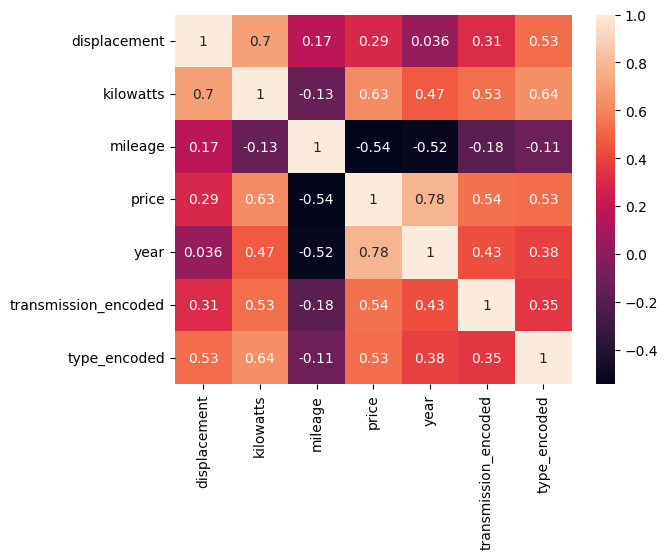

In [57]:
sns.heatmap(data=data_skoda_numeric.corr(), annot=True)

In [13]:
data_skoda[data_skoda["type_encoded"]==2][["type","price"]]

,type,price
1,Limuzina,17800
2,Limuzina,9200
4,Limuzina,4650
5,Limuzina,4950
9,Limuzina,4000
...,...,...
14205,Limuzina,16200
14211,Limuzina,13900
14212,Limuzina,14600
14213,Limuzina,12350


In [49]:
data_skoda.drop([9289], inplace=True)

In [61]:
#MACHINE LEARNING DIO
data_skoda_numeric

,displacement,kilowatts,mileage,price,year,transmission_encoded,type_encoded
0,1.2,55,199689,8900,2011,0,0
1,1.6,81,200650,17800,2015,0,2
2,1.9,77,315000,9200,2008,0,2
3,1.2,44,175000,9250,2010,0,0
4,2.0,85,260874,4650,2002,0,2
...,...,...,...,...,...,...,...
14213,2.0,103,225079,14600,2012,0,2
14214,1.6,77,230000,12350,2011,2,2
14215,1.9,77,282000,10700,2009,0,1
14216,1.6,77,94000,12299,2011,0,1


In [62]:
X = data_skoda_numeric.drop(['price'], axis = 1).values
y= data_skoda_numeric['price'].values

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Treniranje RandomForestRegressora sa najboljim hiperparametrima (prekopirati imena hiperparametara samo bez prefixa "regressor__")
model =  RandomForestRegressor(max_depth=17, min_samples_leaf=8, min_samples_split=4, n_estimators=300)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=17, min_samples_leaf=8, min_samples_split=4,
                      n_estimators=300)

In [76]:
# Predikcija cijene za tražene specifikacije displacement, kilowatts, mileage, year, transmission_encoded, type_encoded
cijena = model.predict([[2, 100, 100_000, 2015, 2, 5]])
cijena_rounded = cijena[0].round(2)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f"Cijena za tražene specifikacije iznosi: {cijena_rounded} KM")
print(r2)

Cijena za tražene specifikacije iznosi: 22755.34 KM
0.9499539934464319


In [59]:
data_skoda["transmission_encoded"].nunique()

3

In [60]:
data_skoda["type_encoded"].nunique()

6

In [12]:
data_skoda_numeric.to_csv("skoda_cleaned_numeric.csv", sep=',', index=False, encoding='utf-8')

In [4]:
data_skoda["model"].nunique()

25